# Analisi sulla predicibilità del cancro

## Descrizione:

Progetto creato da Luca Del Vecchio in data 12/06/2024.

Questa analisi ha come obiettivo quello di evidenziare e mostrare tramite grafici l'andamento della predicibilità del cancro in un set di pazienti secondo diversi indicatori di stili di vita.
L'analisi prende in esame i dati di 1500 pazienti con diversi descrittori.

## Fonti
Rabie El Kharoua. (2024). 🩺📊 Cancer Prediction Dataset 🌟🔬 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8651738


In [172]:
##INSTALLING LIBRARIES
#Commented to save some execution time
#pip install numpy pandas matplotlib pyarrow

In [173]:
##SETUP
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

#Read and store every DB
dati_cancro = pd.read_csv("./dataset/The_Cancer_data_1500_V2.csv",encoding="utf-8",delimiter=",")
dati_cancro.head()


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [174]:
dati_cancro.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


## **Grafico 0**: Analisi iniziale dei dati
Cerchiamo di comprendere i dati che abbiamo a disposizione con delle prime evidenze a dispozione. La più semplice è cercare di capire quale sia l'incidenza di tumori tra uomini/donne sapendo che il campione è tutto sommato omogeneo con 736 donne (indicate nei dati con valore 1) e 764 uomini (indicati con valore 0). Ci aiutano a capire il trend dei casi i due diagrammi a torta, uno di incidenza  di casi per sesso uomo/donna in modo assoluto, il secondo relativamente al totale di casi individuati sano/malato.
I numeri ci dicono rispetto al campione di 1500 pazienti
Malati => 557
Sani => 943
mentre se prendiamo in considerazione i soli malati, di questi abbiamo che le donne sono 364 casi, gli uomini 193 casi, in numero considerevolmente inferiore a quello delle donne nel campione preso in esame.


Gender
1    364
0    193
Name: count, dtype: int64


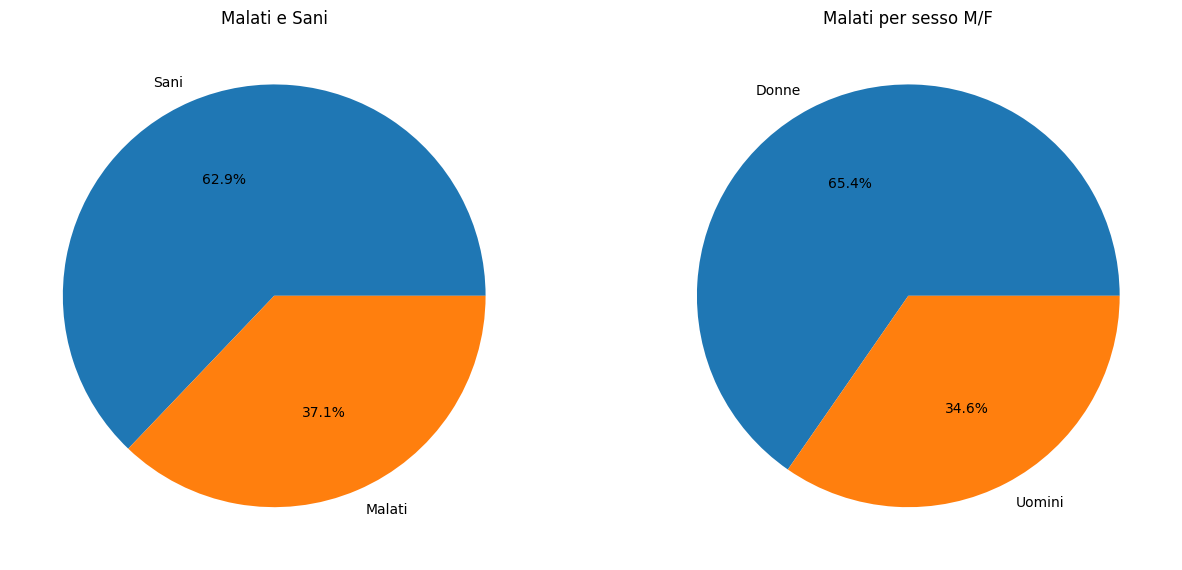

In [175]:
##PIE GRAPH: POPULATION AGE AND MEAN
#Selection of the columns
malati = dati_cancro[dati_cancro['Diagnosis'] == 1]
#print("Malati =>",len(malati)) #=> 557
sani = dati_cancro[dati_cancro['Diagnosis'] == 0]
#print("Sani =>", len(sani)) #=> 943

#Creo due torte affiancate
fig,axn = plt.subplots(1,2,figsize=(15,10))

etichette = np.array(['Sani', 'Malati'])
valori = dati_cancro['Diagnosis'].value_counts()
axn[0].pie(valori,labels=etichette,autopct='%.1f%%')
axn[0].grid()
axn[0].set_title('Malati e Sani')


etichette = np.array(['Donne', 'Uomini'])
valori = malati['Gender'].value_counts()
print(valori)
#print("Uomini => ",len(valori[0])) 93
#print("Donne => ",len(valori[1])) 364
axn[1].pie(valori,labels=etichette,autopct='%.1f%%')
axn[1].grid()
axn[1].set_title('Malati per sesso M/F')


plt.show()

## **Grafico 1**: Predisposizione Uomo/Donna per età
Il successivo grafico che proponiamo nella nostra trattazione vuole mostrare l'incidenza di casi di tumore raggruppando per sesso maschile/femminile e alcune fasce di età.

Tenendo conto degli estremi del campione, abbiamo previsto le fasce di età '20-30', '31-40', '41-50', '51-60', '61-70', '71-80'.

Un ulteriore raffinamento/analisi potrebbe essere fatta allargando o diminuendo il sottoinsieme dei gruppi.

E' interessante notare come l'incidenza di tumore si presenti in valore allarmante per le donne nella fascia di età tra i 51 e 60 anni che deve tradursi come un campanello di allarme per la prevenzioni e i check-up da effettuare in modo più rigoroso in questo momento di vita. In generale, si ravvisa dall'istogramma come i 50 anni siano lo spartiacque per l'aumento di insorgenza di tumori per entrambi i sessi.

Per gli uomini non ci sono particolari picchi, mentre il campione in esame, potrebbe presentare un bias o rumore dovuto alla scarsa numerosità del campione, che mostra un calo anomalo per gli uomini tra i 41 e 50.

/var/folders/w0/09lj_y3d617_0g5k6yqvd3sh0000gn/T/ipykernel_57855/2279837791.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totali_per_fascia = malati.groupby(['Fasce', 'Gender']).size().unstack()


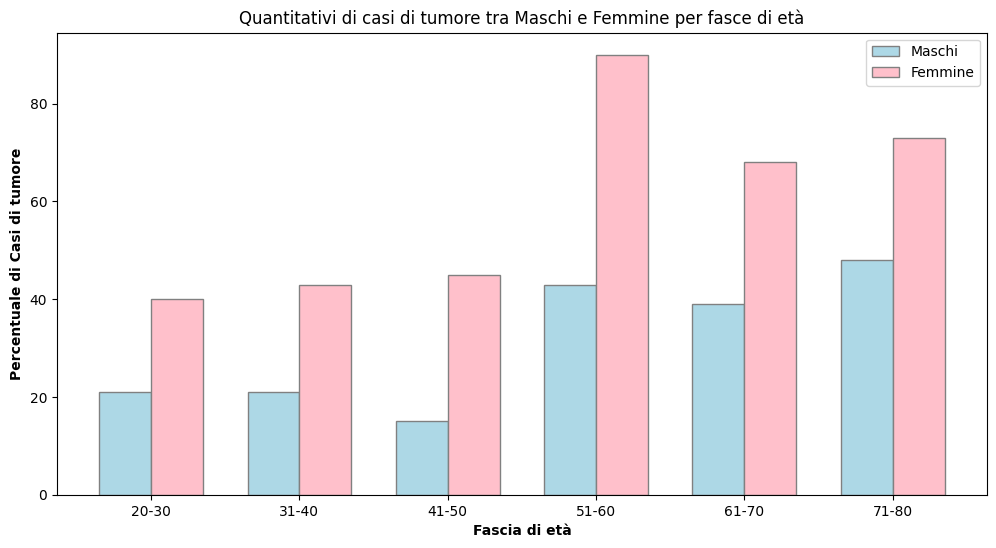

In [176]:
##Grafico 2:
#filtro i dati
pd.options.mode.chained_assignment = None  # default='warn'

affetti = dati_cancro[dati_cancro['Diagnosis'] == 1]
#dm = malati[malati['Gender'] == 1]
#df = malati[malati['Gender'] == 0]

# Definisci le fasce di età
fasce = [20, 30, 40, 50, 60, 70, 80]
etichette = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Aggiungi una colonna per le fasce di età
malati['Fasce'] = pd.cut(malati['Age'], bins=fasce, labels=etichette, right=False)

# Calcola il quantitativo totale di casi di tumore per sesso e fascia di età
totali_per_fascia = malati.groupby(['Fasce', 'Gender']).size().unstack()

# Imposta la larghezza delle barre
bar_width = 0.35

# Imposta la posizione delle barre sul grafico
r1 = np.arange(len(totali_per_fascia))
r2 = [x + bar_width for x in r1]


# Crea una figura e degli assi
plt.figure(figsize=(12, 6))

# Crea le barre per i maschi
plt.bar(r1, totali_per_fascia[0], color='lightblue', width=bar_width, edgecolor='grey', label='Maschi')

# Crea le barre per le femmine
plt.bar(r2, totali_per_fascia[1], color='pink', width=bar_width, edgecolor='grey', label='Femmine')


plt.xlabel('Fascia di età', fontweight='bold')
plt.ylabel('Percentuale di Casi di tumore', fontweight='bold')
plt.title('Quantitativi di casi di tumore tra Maschi e Femmine per fasce di età')
plt.xticks([r + bar_width/2 for r in range(len(totali_per_fascia))], etichette)
plt.legend()
plt.show()


## **Grafico 2:** Incidenza dei singoli fattori di rischio
Proviamo a creare un sommario di incidenza dei singoli fattori di rischi sull'incidenza o meno del tumore.
Usiamo una "*mappa di calore*", una rappresentazione grafica dei dati dove i valori individuali contenuti in una matrice sono rappresentati da colori per mostrare la correlazione tra variabili in gioco, la densità dei dati.

Nel primo dei 4 succesivi schemi possiamo notare: il sesso femminile rilevato dal campione è più predisposto all'insorgenza di tumori.

Nel secondo schema da sinistra, vediamo come chi non fuma (Smoking = 0) sembrerebbe essere meno predisposto all'insorgenza di tumore ma non necessariamente chi ha il tumore è possibile affermare con certezza che sia un fumatore poiché i casi sono piuttosto divisivi.

Anche nel terzo grafico da sinistra sulla predisposizione genetica possiamo notare come l'assenza di predisposizione sia un ottimo elemento per la non insorgenza di tumore (613 casi e 305 a rischio 1) ma la presenza di una diagnosi di tumore non è strattamente legata al rischio genetico (282 presentano tumore a fronte di rischio zero ma 275 totali con rischio 1 e 2 presentano un tumore: la metà dei pazienti tumorali quindi ha rischio o meno)

Nel quarto schema più a destra, la presenza passata di un tumore non incide in maniera significativa sull'insorgenza del cancro stesso: 377 casi sono praticamente nuovi tumori a fronte di 180 casi che hanno già manifestato l'insorgenza di un cancro precedente. Il restante numero è quello delle persone che hanno contratto un cancro e non lo hanno ripreso sotto forme successive.

In [177]:
categorie = ["Gender", "Smoking", "GeneticRisk", "CancerHistory", "Diagnosis"]
nums = [i for i in dati_cancro.columns if i not in categorie]

crosstabs = []
cr_names = []

for i in categorie[:-1]:
    crosstabs += [pd.crosstab(dati_cancro[i], dati_cancro[dati_cancro.columns[-1]])]
    cr_names += [i]

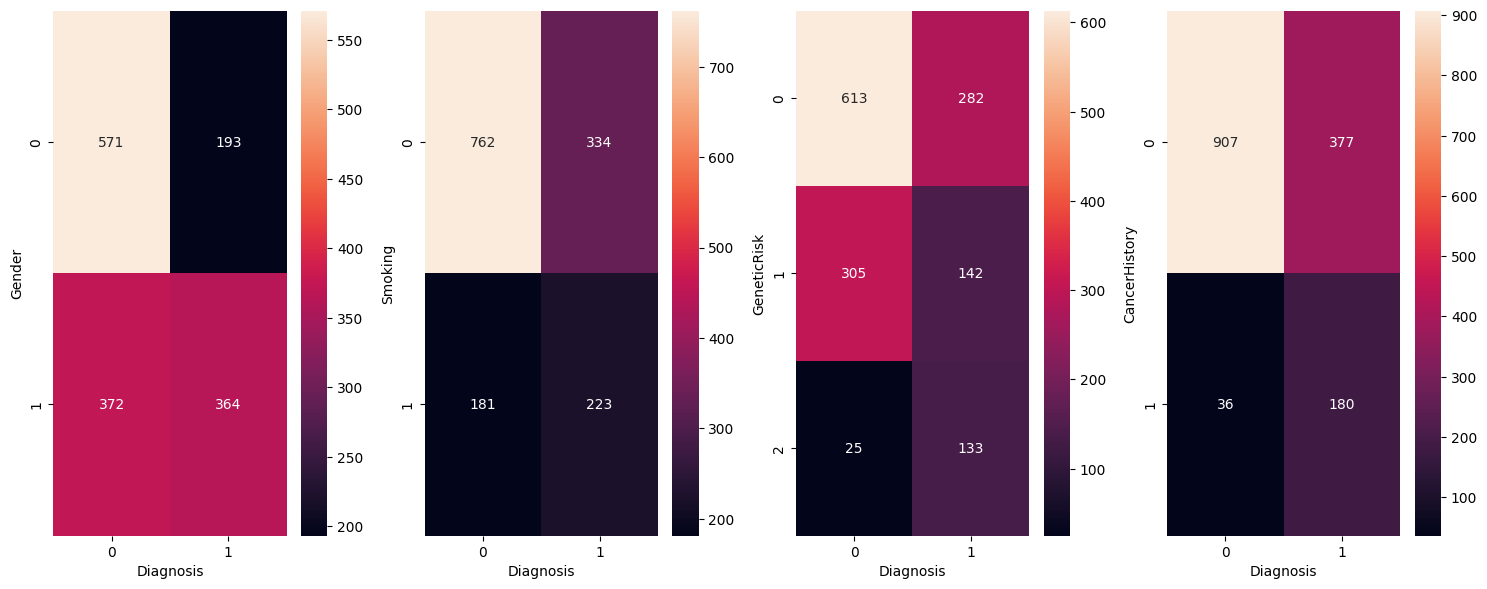

In [178]:

fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

for i, j in enumerate(crosstabs):
    sea.heatmap(j, annot=True, fmt='d', ax=axes[i])
plt.tight_layout()
plt.show()



## **Grafico 3**: fattore di rischio e indice BMI
Procediamo nell'analisi dei dati del campione. Questa volta vogliamo visualizzare l'incidenza dei vari fattori di rischio misurati nel dettaglio. Andiamo a realizzare un diagramma a righe che mostri l'andamento quantitativo dei casi di tumore nei pazienti al variare della massa corporea riportata nel campione BMI.
I dati sembrano inequivocabili rispetto al nostro campione: un indice di massa corporea sbilanciato verso l'obesità incide significativamnte sul presentarsi di casi di tumore. Analizziamo graficamente l'andamento sia in numero assoluto che riferito al sesso uomo/donna.

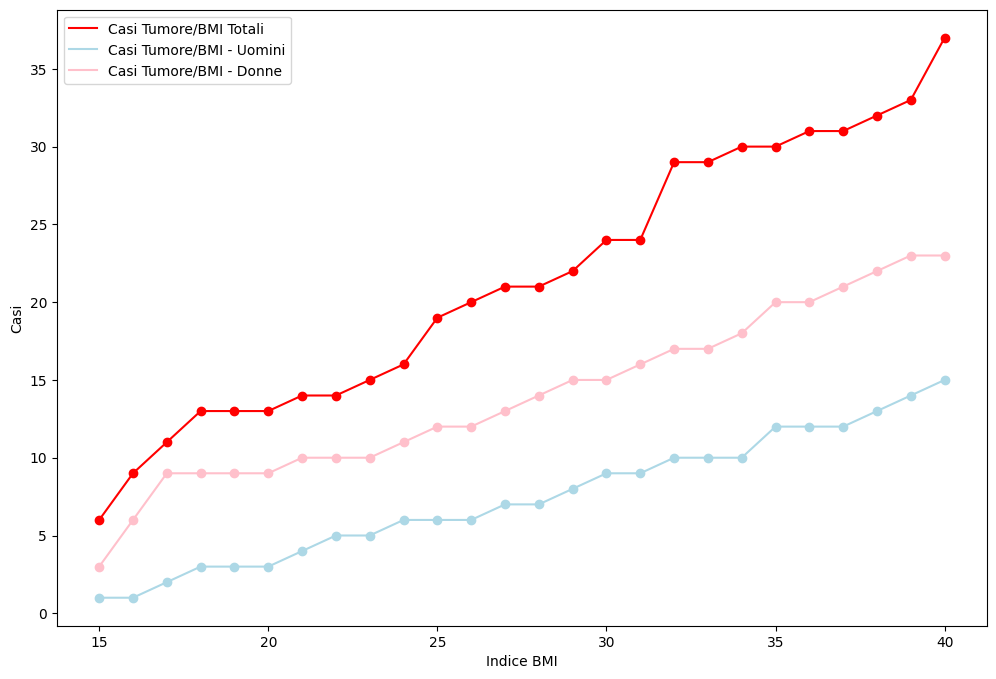

In [179]:
malati = dati_cancro[dati_cancro['Diagnosis'] == 1]
bmi = round(malati['BMI'],0).value_counts()
#print(bmi)
#valori = np.arange(1, 41) # valori registrati di BMI da 1 a 40print(bmi)
valori = round(malati['BMI'],0).unique() #non posso prende i valori da 1 a 40 ma solo quelli che si presentano
valori = sorted(valori, reverse=True)

plt.figure(figsize=(12,8))
plt.xlabel('Indice BMI')
plt.ylabel('Casi')

plt.plot(valori,bmi,color='red',label="Casi Tumore/BMI Totali")
plt.scatter(valori, bmi, color="red")


malati_uomo = malati[malati['Gender'] == 0]
malati_donna = malati[malati['Gender'] == 1]
#print(malati_uomo)
#print(malati_donna)

bmi_uomo = round(malati_uomo['BMI'],0).value_counts()
valori1= round(malati_uomo['BMI'],0).unique() #non posso prende i valori da 1 a 40 ma solo quelli che si presentano
valori1 = sorted(valori1, reverse=True)
plt.plot(valori1,bmi_uomo,color='lightblue',label="Casi Tumore/BMI - Uomini")
plt.scatter(valori1, bmi_uomo, color="lightblue")


bmi_donna = round(malati_donna['BMI'],0).value_counts()
valori2= round(malati_donna['BMI'],0).unique() #non posso prende i valori da 1 a 40 ma solo quelli che si presentano
valori2 = sorted(valori2, reverse=True)
plt.plot(valori2,bmi_donna,color='pink',label="Casi Tumore/BMI - Donne")
plt.scatter(valori2, bmi_donna, color="pink")

#Show the graph
plt.legend()
plt.show()





## **Grafico 4**: incidenza dell'attività fisica
Se sui fattori di rischio non è possibile trovare un chiaro elemento di incidenza sul tumore, la presenza di atitvità fisica a livello anche intenso sembrerebbe essere invece in modo indiscutibile un ottimo sistema di prevenzione del cancro. Uno sportivo, probabilmente segue un sistema di vita sano  che rende più esigua l'incidenza di un tumore, anche se non ne azzera purtroppo la possibile insorgenza. Il grafico che segue mostra con assoluta chiarezza come il numero maggiore di casi rilevati sia presente a fronte di mancanza di attività fisica mentre si riduce all'aumentare delle ore settimanali dedicate.


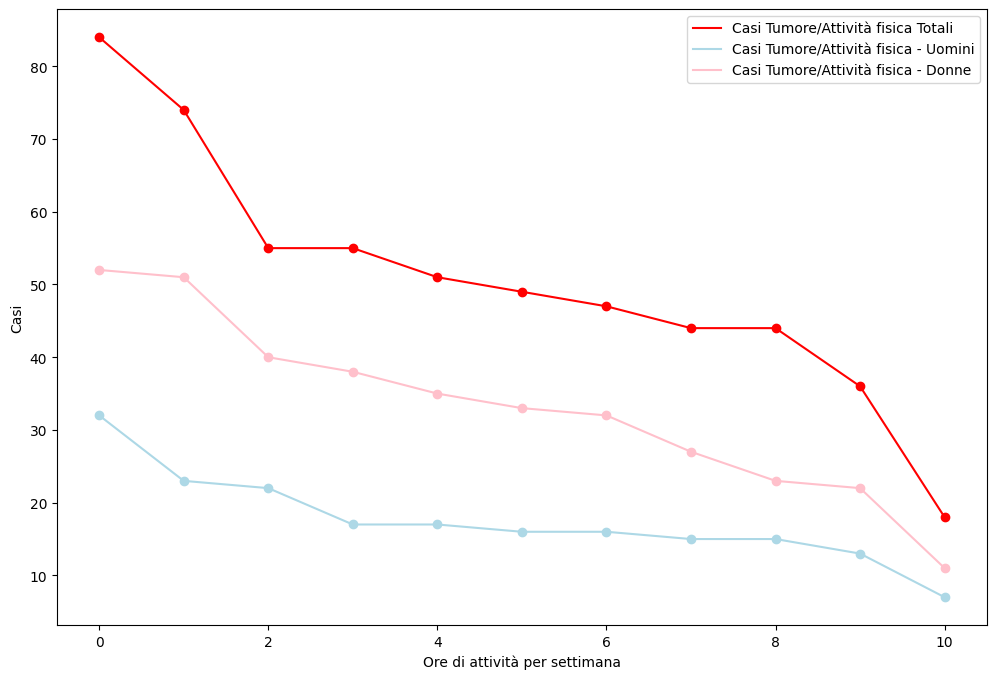

In [180]:
malati = dati_cancro[dati_cancro['Diagnosis'] == 1]
bmi = round(malati['PhysicalActivity'],0).value_counts()
#print(bmi)
#valori = np.arange(1, 41) # valori registrati di BMI da 1 a 40print(bmi)
valori = round(malati['PhysicalActivity'],0).unique() #non posso prende i valori da 1 a 40 ma solo quelli che si presentano
valori = sorted(valori, reverse=False)

plt.figure(figsize=(12,8))
plt.xlabel('Ore di attività per settimana')
plt.ylabel('Casi')

plt.plot(valori,bmi,color='red',label="Casi Tumore/Attività fisica Totali")
plt.scatter(valori, bmi, color="red")


malati_uomo = malati[malati['Gender']  == 0]
malati_donna = malati[malati['Gender'] == 1]
#print(malati_uomo)
#print(malati_donna)

bmi_uomo = round(malati_uomo['PhysicalActivity'],0).value_counts()
valori1= round(malati_uomo['PhysicalActivity'],0).unique() #non posso prende i valori da 1 a 40 ma solo quelli che si presentano
valori1 = sorted(valori1, reverse=False)
plt.plot(valori1,bmi_uomo,color='lightblue',label="Casi Tumore/Attività fisica - Uomini")
plt.scatter(valori1, bmi_uomo, color="lightblue")


bmi_donna = round(malati_donna['PhysicalActivity'],0).value_counts()
valori2= round(malati_donna['PhysicalActivity'],0).unique() #non posso prende i valori da 1 a 40 ma solo quelli che si presentano
valori2 = sorted(valori2, reverse=False)
plt.plot(valori2,bmi_donna,color='pink',label="Casi Tumore/Attività fisica - Donne")
plt.scatter(valori2, bmi_donna, color="pink")

#Show the graph
plt.legend()
plt.show()

## **Grafico 5:** incidenza del fumo con altri fattori
Analizziamo quanto incide il tabagismo sul tumore. I dati raccolti non indicano la tipologia di tumore diagnosticata se, ad esempio, direttamente connessa al sistema polmonare. Dobbiamo assumere un generico aumento di rischio quindi connesso agli effetti diretti ed indiretti dell'uso delle sigarette. Proviamo prima di tutto a comprendere come i fumatori si distribuiscono per densità rispetto alle altre categorie

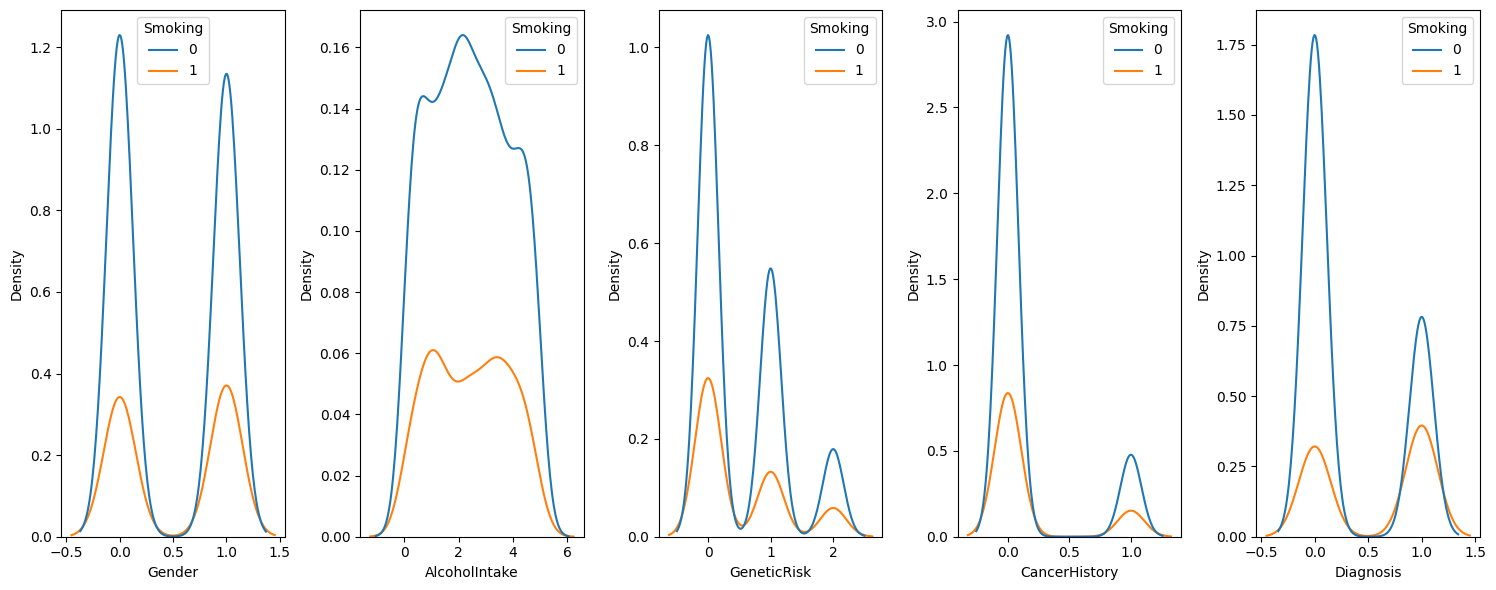

In [181]:



  #display(HTML("<h2>{}</h2>".format(Smoking)))
nums = ["Gender", "AlcoholIntake", "GeneticRisk", "CancerHistory", "Diagnosis"]
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
for j, k in enumerate(nums):
    sea.kdeplot(dati_cancro, x=k, hue="Smoking", ax=axes[j])
plt.tight_layout()
plt.show()

## **Grafico 6**: grafici a coppie su casi di fumatori
Qui proviamo ad utilizzare un pairplot per visualizzare le correlazioni tra le varie categorie e la presenza di fumo nei pazienti. I diagrammi mettono ancora una volta in luce come (vedi diagonale), ci sia una predisposzione  all'insorgenza tumorale per chi fuma ed è donna, e chi assume grandi quantità di alcolici quindi assieme al fumo stesso. Mentre i grafici sono incocludenti nel riscontrare significative evidenze tra casistiche, probabilmente anche connesso ad una scarsa numerosità del campione. Ci aspettiamo di trovare analoghe situazioni riducendo i dati ad un singolo fattore di rischio con correlazione agli altri.


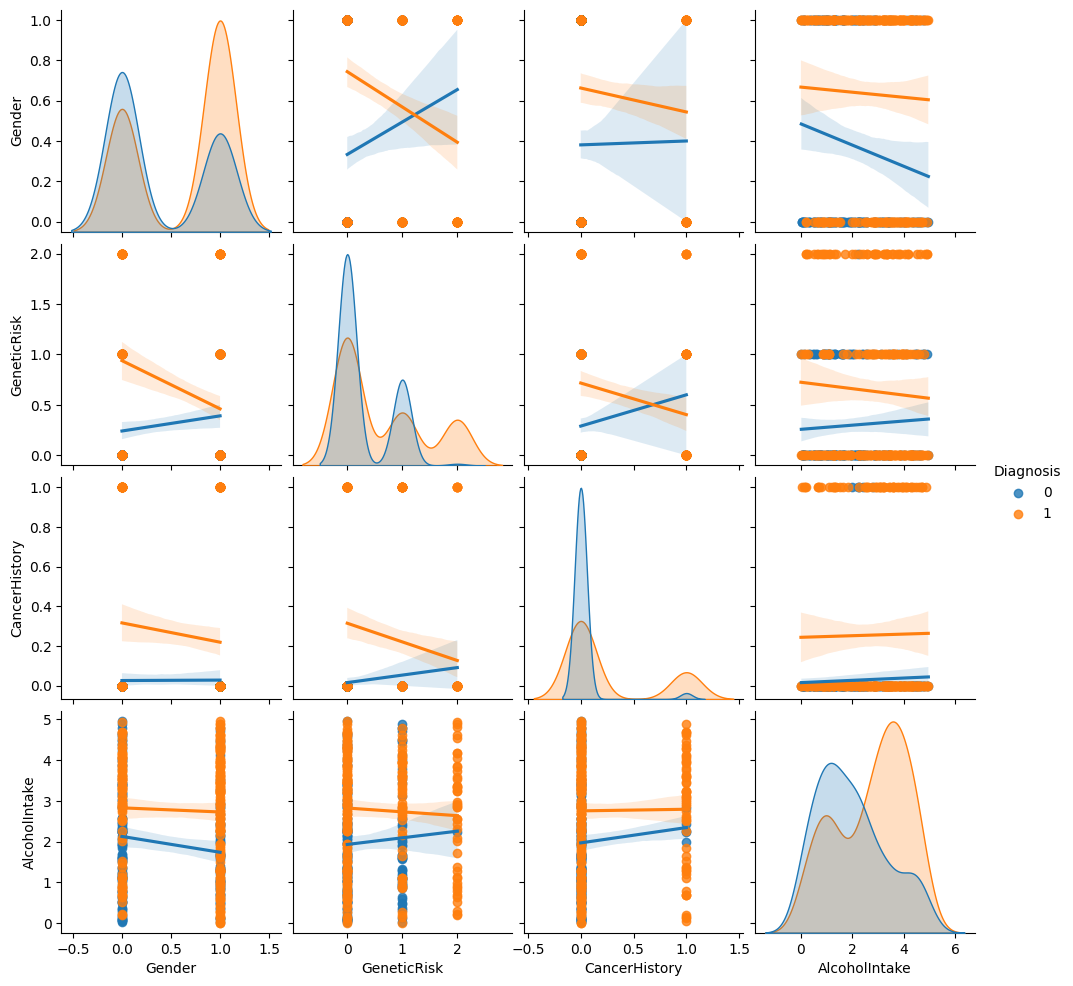

In [182]:
categorie = ["Gender", "Smoking", "AlcoholIntake", "GeneticRisk", "CancerHistory", "Diagnosis"]
nums = [i for i in dati_cancro.columns if i not in categorie]

fumatori = dati_cancro[dati_cancro['Smoking'] == 1]
sea.pairplot(fumatori, vars=["Gender", "GeneticRisk", "CancerHistory", "AlcoholIntake"], hue=categorie[-1], kind='reg')
plt.show()

## Conclusioni

Studiando questo dataset ho avuto un esempio ridotto ma significativo di dati necessari per proporre l'analisi svolta. Sono rimasto sorpreso di come l'incidenza tumorale non risponda perfettamente ad uno stile di vita soltanto di scarsa propensione alla salute ma colpisca a prescindere, solo con probabilità meno evidenti in chi invece conduce presumibilmente uno stile di vita più sano tra sport e cura del corpo. Nel dataset non abbiamo avuto la consapevolezza dei cambiamenti storici dei dati su periodi diversi da quello istantaneo ripreso dal dataset stesso. Sarebbe opportuno come sviluppo futuro avere anche uno storico per comprendere l'evoluzione dei casi non solo in numerosità intrinseca ma anche della correlazione tra loro a seconda dei fattori di rischio.